In [1]:
import forecasting_system.data_access_layer as dal
import forecasting_system.data_cleaner as dc
import forecasting_system.modeller as m
import datetime as dt


observation_data = dal.read_data_file('demanddata_2023.csv')
observation_data = dc.format_national_grid_data(observation_data, 'ND')  # demand data is in MW

# create basic calendar variables
observation_data['Day_of_week'] = observation_data.index.to_series().dt.dayofweek
observation_data['Day_of_year'] = observation_data.index.to_series().dt.dayofyear

observation_data.head()

,SETTLEMENT_PERIOD,Observation,EMBEDDED_SOLAR_GENERATION,Day_of_week,Day_of_year
Date_Time,,,,,
2023-01-01 00:00:00,1,21043,0,6,1
2023-01-01 00:30:00,2,21756,0,6,1
2023-01-01 01:00:00,3,21348,0,6,1
2023-01-01 01:30:00,4,20586,0,6,1
2023-01-01 02:00:00,5,19781,0,6,1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10851 (42.39 KB)
Trainable params: 10851 (42.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


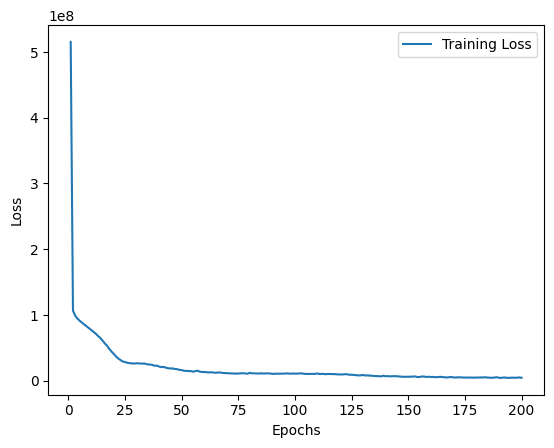

Trained Model (Lstm, {'normalise': False, 'Learning_rate': 0.05, 'Epochs': 200, 'Loss_function': 'mse', 'Plot_loss': True, 'variables': ['SETTLEMENT_PERIOD', 'Day_of_week', 'Day_of_year']}) <keras.src.engine.sequential.Sequential object at 0x000001C3ECF6FD90>


In [2]:
configuration = {
    # # ARIMA options
    # 'lags': 48,
    # 'AR_lags': [1, 2, 48],
    # 'differences': 1,
    # 'MA_lags': 0,
    # LSTM options
    'normalise': False,
    'Learning_rate': 0.05,
    'Epochs': 200,
    'Loss_function': 'mse',
    'Plot_loss': True,
    'variables': ['SETTLEMENT_PERIOD', 'Day_of_week', 'Day_of_year']
}

model = m.create_model('Lstm', configuration)
m.train_model(model, observation_data, '2023-01-01', '2023-03-01')
print(model)

21/21 [==============================] - 0s 650us/step
{'MAE': 2418.482302533532, 'RMSE': 3115.059735783986, 'MAPE': 0.07951284503023073}


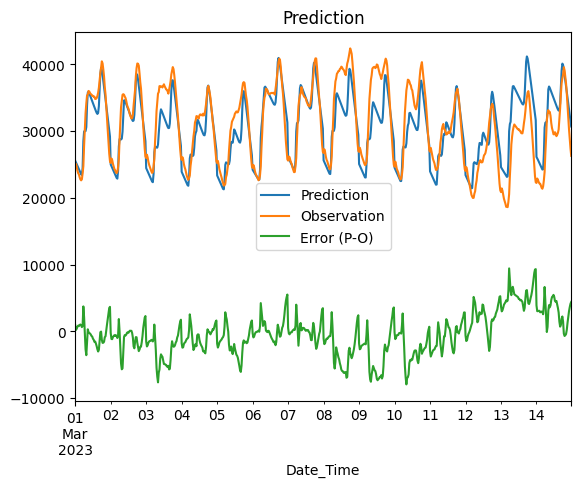

In [3]:
prediction = m.predict_from_model(model, observation_data, '2023-03-01', 48*14, dt.timedelta(minutes=30))
print(prediction.calculate_metrics())
prediction.plot()